# Naive Bayes Classification

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

##### Working on Loan Prediction using the Dataset

In [29]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Loading dataset
data=pd.read_csv(r'C:\Users\potla\ML_LAB\DataSets\Loan Prediction Dataset.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
#checking null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
from sklearn import preprocessing

In [33]:
#performing label encoding on Loan_Status column
labelencoder=preprocessing.LabelEncoder()
data['Loan_Status']=labelencoder.fit_transform(data['Loan_Status'])

In [34]:
#filling null values
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [35]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [36]:
data=data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
#Applying label encoding to following attributes
labelobj=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [38]:
for x in labelobj:
    data[x]=labelencoder.fit_transform(data[x])

In [39]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<AxesSubplot:>

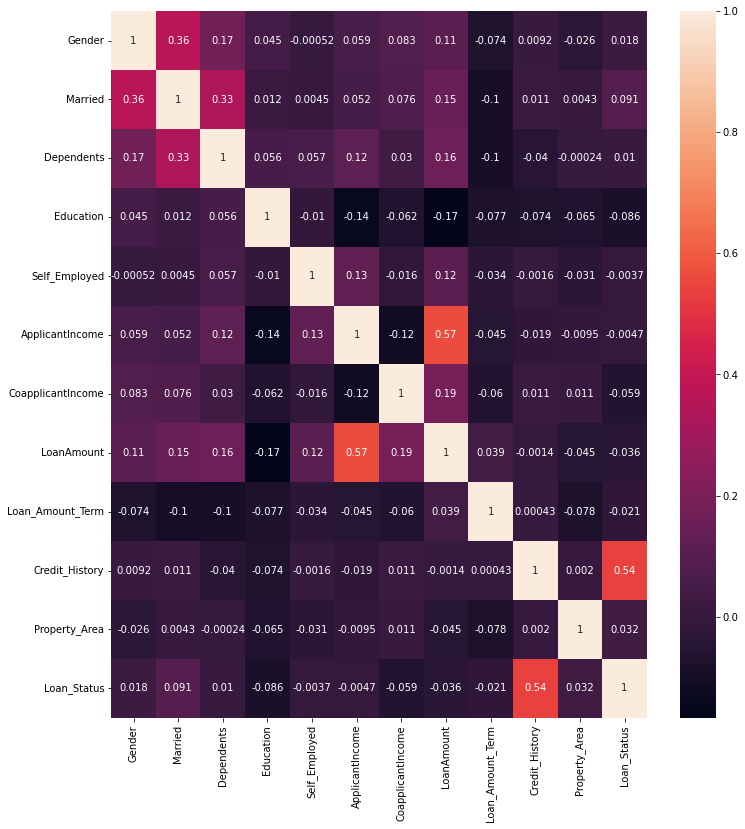

In [40]:
#Heatmap
plt.figure(figsize=(12,13))
sns.heatmap(data.corr(),annot=True)

In [41]:
data=data.drop({'Loan_ID'},axis=1)

In [42]:
x=data.drop({'Loan_Status'},axis=1)
y=data['Loan_Status']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.naive_bayes import GaussianNB

In [53]:
#Splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=78)

In [54]:
#fitting the model
clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [55]:
test_predict=clf.predict(x_test)

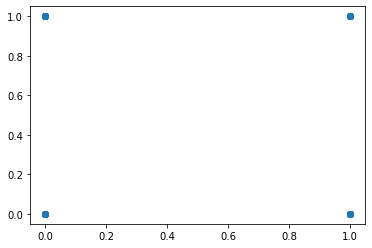

In [56]:
#scatter plot between y_test,test_predict
plt.scatter(y_test,test_predict)

In [57]:
from sklearn import metrics

In [62]:
#printing confusion matrix
confusion_matrix=metrics.confusion_matrix(y_test,test_predict)
confusion_matrix

array([[ 19,  21],
       [  7, 107]], dtype=int64)

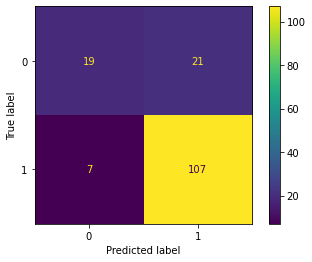

In [64]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=clf.classes_)
disp.plot()

In [65]:
#printing classification report
print(metrics.classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.73      0.47      0.58        40
           1       0.84      0.94      0.88       114

    accuracy                           0.82       154
   macro avg       0.78      0.71      0.73       154
weighted avg       0.81      0.82      0.80       154



In [66]:
print("The accuracy of the model is", round(metrics.accuracy_score(y_test,test_predict),2)*100 , "%")

The accuracy of the model is 82.0 %
